In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import scipy.io.wavfile as siowav
import IPython
from scipy.signal import find_peaks
import sounddevice as sd
import wavio as wv

In [2]:
rollno = 224
a = 1 + np.mod(rollno,3)

## Problem 1

Text(0.5, 1.0, 'Chirp Signal')

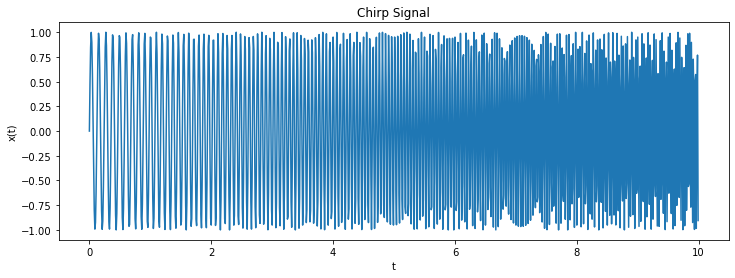

In [47]:
t = np.arange(0,10,1/100)
F = np.arange(2+2*a, 5+5*a, (5+5*a-2-2*a)/len(t))

x = np.sin(2*np.pi*F*t)
plt.figure(figsize=(12,4))
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Chirp Signal')

Text(0.5, 1.0, 'DFT of Chirp Signal')

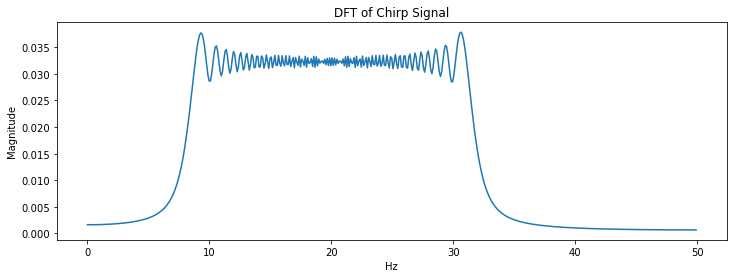

In [107]:
dft = abs(np.fft.rfft(x))/len(np.fft.fft(x))
Hz = np.arange(0,50,50/len(dft))

plt.figure(figsize=(12,4))
plt.plot(Hz, dft)
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.title('DFT of Chirp Signal')

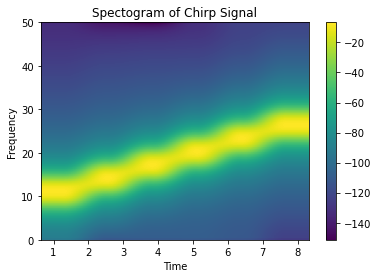

In [109]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(x, Fs=100)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram of Chirp Signal')
plt.colorbar()

Text(0.5, 1.0, 'DFT after Blackman Windowing')

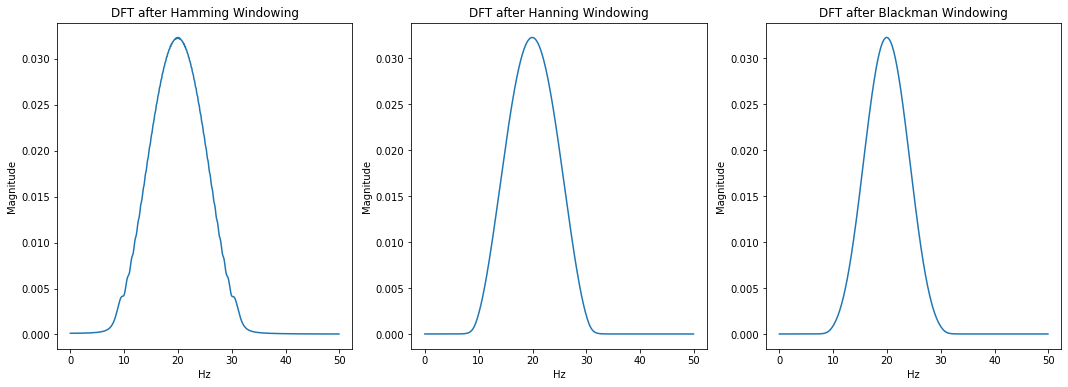

In [110]:
hamming_100 = np.hamming(1000)*x[:1000]
dft_hamming_100 = abs(np.fft.rfft(hamming_100))/len(np.fft.fft(hamming_100))

hanning_100 = np.hanning(1000)*x[:1000]
dft_hanning_100 = abs(np.fft.rfft(hanning_100))/len(np.fft.fft(hanning_100))

blackman_100 = np.blackman(1000)*x[:1000]
dft_blackman_100 = abs(np.fft.rfft(blackman_100))/len(np.fft.fft(blackman_100))

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.plot(Hz, dft_hamming_100)
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.title('DFT after Hamming Windowing')

plt.subplot(132)
plt.plot(Hz, dft_hanning_100)
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.title('DFT after Hanning Windowing')

plt.subplot(133)
plt.plot(Hz, dft_blackman_100)
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.title('DFT after Blackman Windowing')

Text(0.5, 1.0, 'Spectogram with Blackman window of 100 samples')

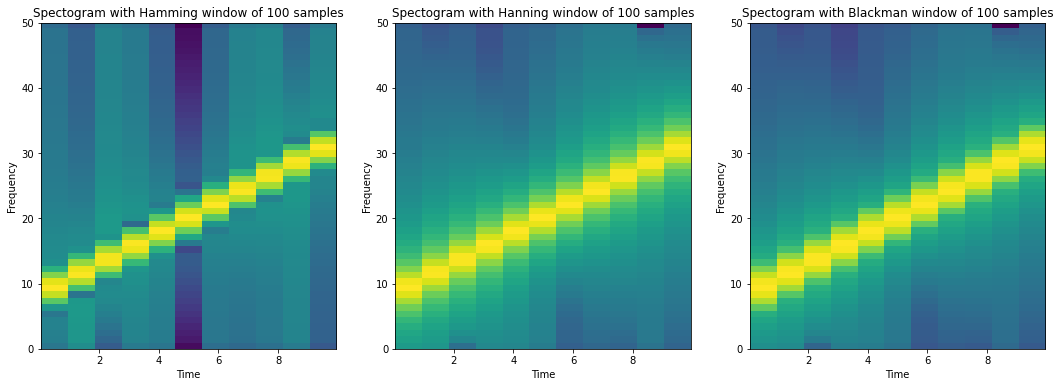

In [113]:
plt.figure(figsize=(18,6))

plt.subplot(131)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(x, Fs=100, window=np.hamming(100), NFFT = 100, noverlap=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram with Hamming window of 100 samples')

plt.subplot(132)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(x, Fs=100, window=np.hanning(100), NFFT = 100, noverlap=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram with Hanning window of 100 samples')

plt.subplot(133)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(x, Fs=100, window=np.blackman(100), NFFT = 100, noverlap=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram with Blackman window of 100 samples')

<ipython-input-115-cdf1e60db5cc>:34: UserWarning: Only one segment is calculated since parameter NFFT (=1000) >= signal length (=1000).
  powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(x, Fs=100, window=np.hamming(1000), NFFT = 1000, noverlap=10)


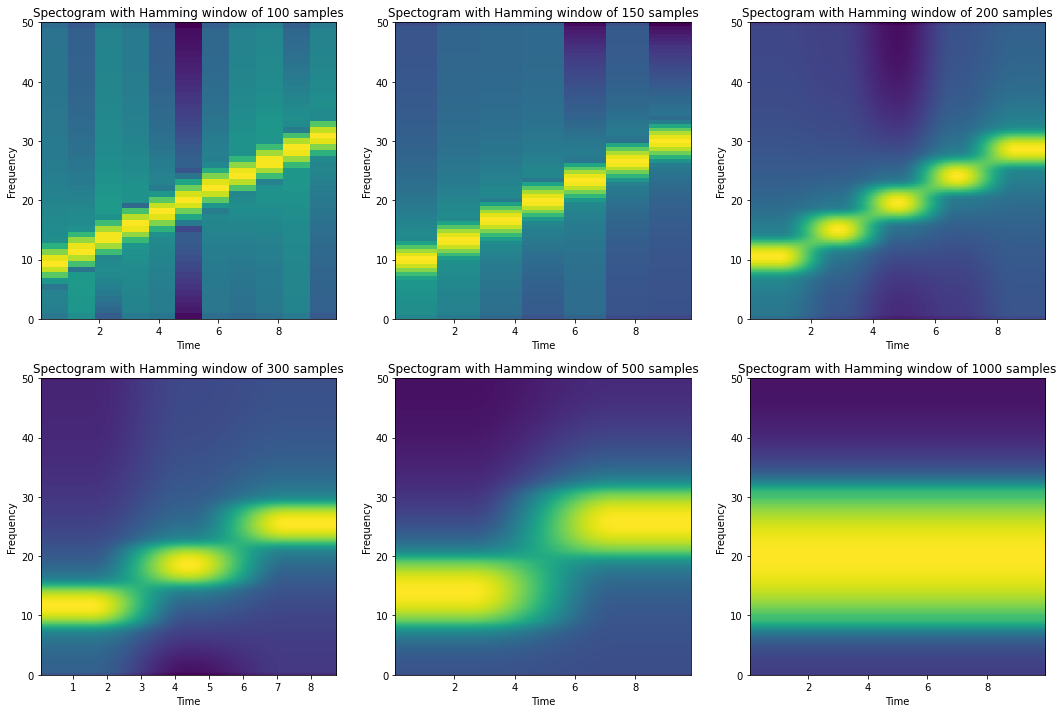

In [115]:
plt.figure(figsize=(18,12))

plt.subplot(231)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(x, Fs=100, window=np.hamming(100), NFFT = 100, noverlap=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram with Hamming window of 100 samples')

plt.subplot(232)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(x, Fs=100, window=np.hamming(150), NFFT = 150, noverlap=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram with Hamming window of 150 samples')

plt.subplot(233)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(x, Fs=100, window=np.hamming(200), NFFT = 200, noverlap=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram with Hamming window of 200 samples')

plt.subplot(234)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(x, Fs=100, window=np.hamming(300), NFFT = 300, noverlap=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram with Hamming window of 300 samples')

plt.subplot(235)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(x, Fs=100, window=np.hamming(500), NFFT = 500, noverlap=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram with Hamming window of 500 samples')

plt.subplot(236)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(x, Fs=100, window=np.hamming(1000), NFFT = 1000, noverlap=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram with Hamming window of 1000 samples')

plt.savefig('vary_window_spectogram.png')

## Problem 2

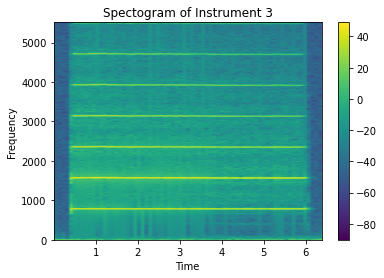

In [76]:
Fs, instrument = siowav.read('instru3.wav')
instrument = instrument - np.mean(instrument)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(instrument, Fs=Fs, window=np.hamming(1000), NFFT = 1000, noverlap=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram of Instrument 3')
plt.colorbar()

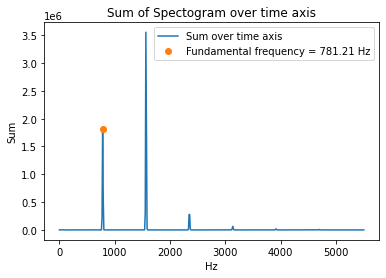

In [79]:
threshold = 10*powerSpectrum.shape[1]
Hz = (np.arange(0,powerSpectrum.shape[0])/powerSpectrum.shape[0])*Fs/2
fundamental = np.min(find_peaks(np.sum(powerSpectrum, axis=1), distance=int(len(np.sum(powerSpectrum, axis=1))/100), threshold=threshold)[0])
fundamental_Hz = (fundamental/powerSpectrum.shape[0])*Fs/2

plt.plot(Hz, np.sum(powerSpectrum,axis=1))
plt.plot(fundamental_Hz, (np.sum(powerSpectrum,axis=1))[fundamental],'o')
plt.xlabel('Hz')
plt.ylabel('Sum')
plt.title('Sum of Spectogram over time axis')
plt.legend(['Sum over time axis','Fundamental frequency = '+str(round(fundamental_Hz,2))+' Hz'], loc='upper right')

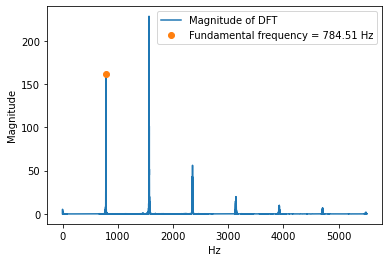

In [80]:
dft_instrument = abs(np.fft.rfft(instrument))/len(np.fft.fft(instrument))
Hz = np.arange(0,Fs/2,Fs/(2*len(dft_instrument)))
threshold = 10
fundamental = np.min(find_peaks(dft_instrument, distance=int(len(dft_instrument)/1000), threshold=threshold)[0])
fundamental_Hz = fundamental*Fs/(2*len(dft_instrument))

plt.plot(Hz, dft_instrument)
plt.plot(fundamental_Hz, dft_instrument[fundamental],'o')
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.legend(['Magnitude of DFT','Fundamental frequency = '+str(round(fundamental_Hz,2))+' Hz'], loc='upper right')

Text(0.5, 1.0, 'Spectogram of Opera Signal')

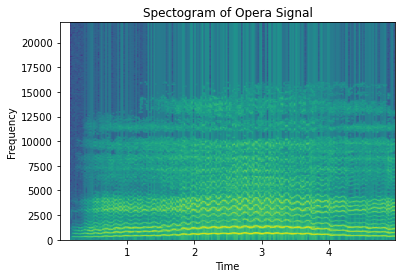

In [91]:
Fs, opera = siowav.read('opera.wav')
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(opera, Fs=Fs, window=np.hamming(1000), NFFT = 1000, noverlap=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram of Opera Signal')

## Problem 3

Text(0.5, 1.0, "Spectogram of the word 'Shreyas'")

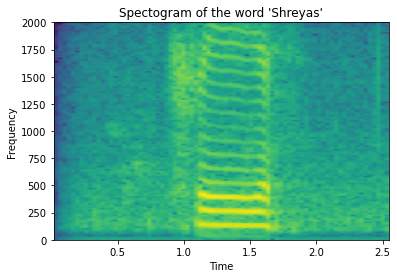

In [3]:
Fs, name = siowav.read('name.wav')
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(name, Fs=Fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title("Spectogram of the word 'Shreyas'")

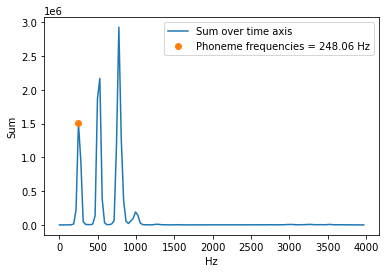

In [15]:
Hz = (np.arange(powerSpectrum.shape[0])/powerSpectrum.shape[0])*Fs
fundamental = np.min(find_peaks(np.sum(powerSpectrum, axis=1), distance=int(len(np.sum(powerSpectrum, axis=1))/100), threshold=0.5*(10**6))[0])
fundamental_Hz = (fundamental/powerSpectrum.shape[0])*Fs
plt.plot(Hz, np.sum(powerSpectrum, axis=1))
plt.plot(fundamental_Hz, np.sum(powerSpectrum, axis=1)[fundamental],'o')
plt.xlabel('Hz')
plt.ylabel('Sum')
plt.legend(['Sum over time axis','Phoneme frequencies = '+str(round(fundamental_Hz,2))+' Hz'], loc='upper right')

In [104]:
IPython.display.Audio(name, rate=Fs)